#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
# df = pd.read_csv('Salaries.csv')

# df = pd.read_csv('Salaries.csv', error_bad_lines=False)

# df = pd.read_csv('Salaries.csv', on_bad_lines='skip')

dtype_dict = {
    'Id': str,
    # 'EmployeeName': str,
    # 'JobTitle': str,
    # 'BasePay': object,
    # 'OvertimePay': object,
    'OtherPay': object,
    # 'Benefits': object,
    # 'TotalPay': object,
    'TotalPayBenefits': object,
    # 'Year': object,
    'Notes': object,
    # 'Agency': str,
    # 'Status': object
}

df = pd.read_csv('/content/Salaries.csv', dtype=dtype_dict, on_bad_lines='skip')

df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
# Number of rows and columns
rows = df.shape[0]
columns = df.shape[1]

print("Number of rows:", rows)
print("Number of columns:", columns)

# Data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


Number of rows: 148654
Number of columns: 13
Id                   object
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay             object
Benefits            float64
TotalPay            float64
TotalPayBenefits     object
Year                  int64
Notes                object
Agency               object
Status              float64
dtype: object
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [10]:
# Basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
range_salary = df['TotalPay'].max() - df['TotalPay'].min()
std_salary = df['TotalPay'].std()

print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)
print("Salary range:", range_salary)
print("Standard deviation of salary:", std_salary)

Mean salary: 74768.321971703
Median salary: 71426.60999999999
Mode salary: 0.0
Minimum salary: -618.13
Maximum salary: 567595.43
Salary range: 568213.56
Standard deviation of salary: 50517.005273949944


In [5]:
# Dropping rows with missing values
"""
Dropping rows with missing values: (after searching I found this explanation about why we use this method for data cleaning)

1- This approach is suitable when the number of missing values is relatively small compared to the total size of the dataset.
2- It's also effective when the missing values are randomly distributed across the dataset.
3- However, dropping rows may lead to loss of potentially valuable information, especially if the missing values represent a significant portion of the dataset or if they contain important patterns.
"""
data_cleaned = df.dropna()



# Or filling missing values with mean
"""
Filling missing values with the mean: (after searching I found this explanation about why we use this method for data cleaning)

1- This approach is suitable when the missing values are numeric and can be reasonably approximated by the mean of the column.
2- It helps to retain more data compared to dropping rows, which can be crucial when data is limited.
3- However, filling missing values with the mean may distort the distribution of the data, especially if the missing values are not missing at random or if there are outliers in the dataset.
"""
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace=True)


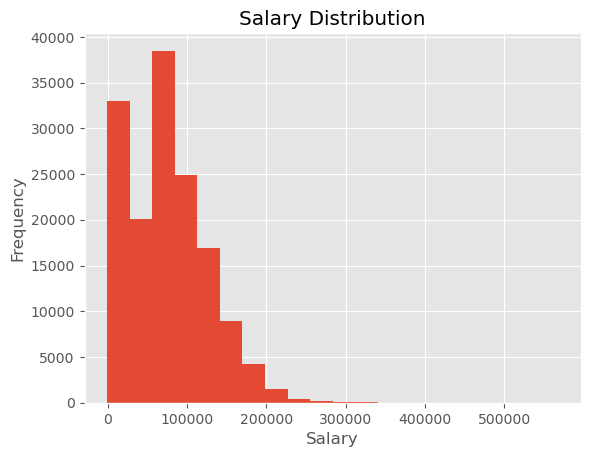

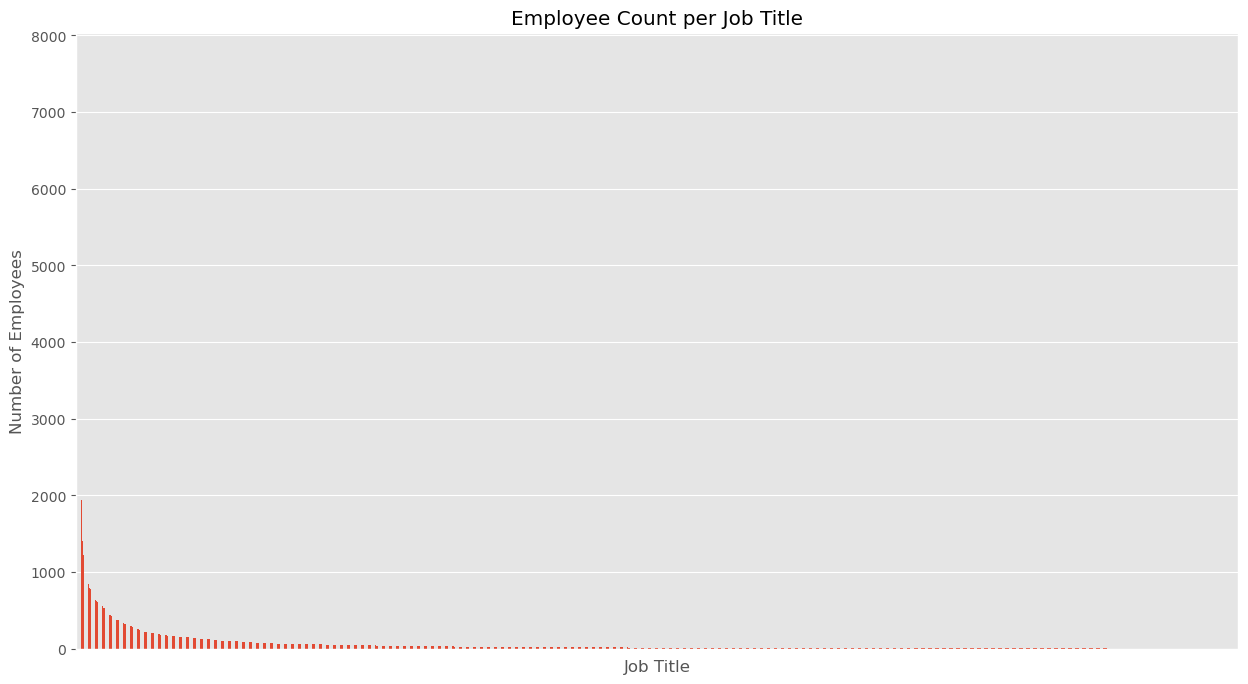

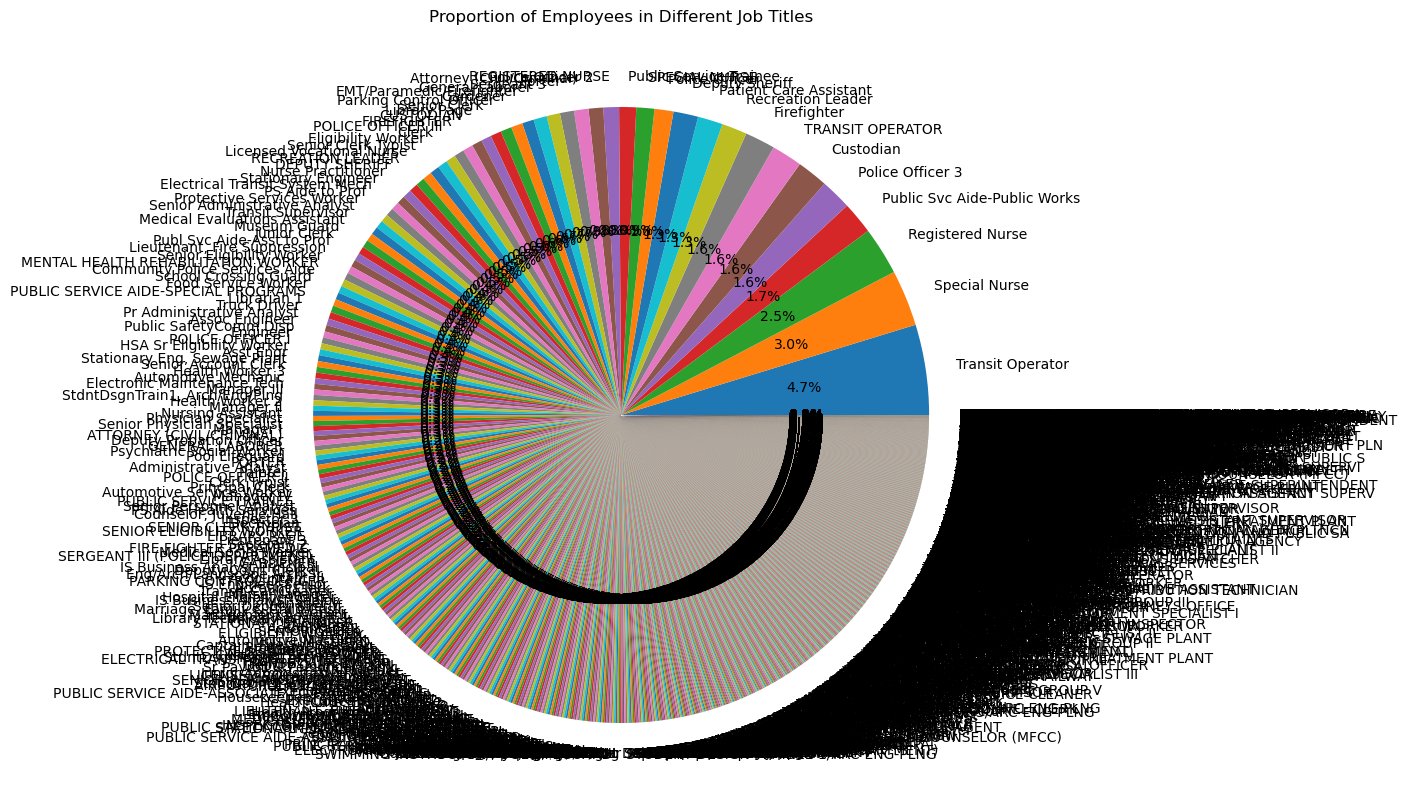

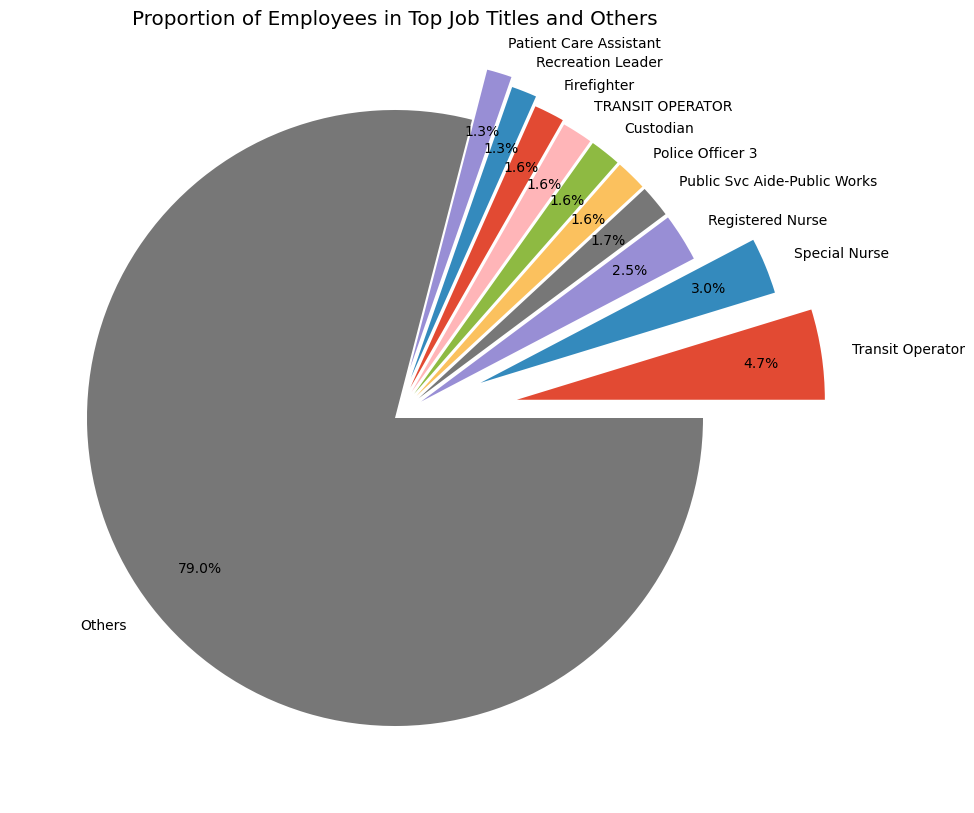

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for salary distribution
plt.style.use('ggplot')
plt.hist(df['TotalPay'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()



# Bar chart for department proportions
plt.figure(figsize=(15, 8))
plt.style.use('ggplot')
department_counts = df['JobTitle'].value_counts()
department_counts.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.title('Employee Count per Job Title')
plt.xticks([])  # Hides x-axis ticks for better readability
plt.show()



# Pie chart for department proportions 1
plt.figure(figsize=(10, 10))
plt.style.use('default')

department_counts = df['JobTitle'].value_counts()

# Creating a pie chart for all job titles
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Job Titles')
plt.show()



# Pie chart for department proportions 2
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
top_n = 10  # Number of top job titles to display

department_counts = df['JobTitle'].value_counts()
top_job_titles = department_counts.head(top_n)

# Create a pie chart for the top job titles and aggregate the rest
other_count = department_counts.sum() - top_job_titles.sum()
top_job_titles['Others'] = other_count
explode = (0.4, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.14, 0.17, 0)
plt.pie(top_job_titles, labels=top_job_titles.index, explode=explode, pctdistance=0.8, autopct='%1.1f%%')
plt.title('Proportion of Employees in Top Job Titles and Others')
plt.show()


In [7]:
# Grouping by department and calculating average salary
average_salary_by_department = df.groupby('JobTitle')['TotalPay'].mean()
print(average_salary_by_department)


JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2159, dtype: float64


Correlation between TotalPay and OvertimePay: 0.504858870452246


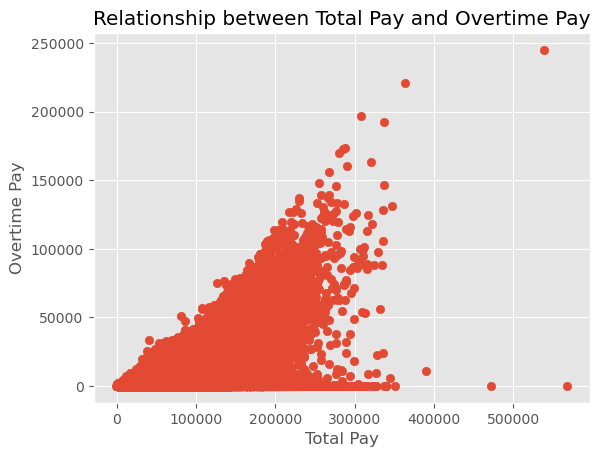

In [8]:
# Calculating correlation between salary and another numerical column
correlation = df['TotalPay'].corr(df['OvertimePay'])
print("Correlation between TotalPay and OvertimePay:", correlation)

# Scatter plot for visualization
plt.scatter(df['TotalPay'], df['OvertimePay'])
plt.xlabel('Total Pay')
plt.ylabel('Overtime Pay')
plt.title('Relationship between Total Pay and Overtime Pay')
plt.show()


# Good Luck!